# HW1: Data visualization (Due by Apr 14 11:59pm)

This homework addresses data visualization and data manipulation.

Before you submit this Jupyter Notebook (.ipynb file) to Gradescope, **please restart your kernel and run all.** You do not need to submit a pdf file or .py file.

In [1]:
#Fox Davenport
#PIC 16B
#UID: 905697315
#4/14/24

## Part 1: Combine multiple DataFrame objects to a large dataframe ( 5 pts )

Given the following temperature datasets, combine them to a large dataframe using `pandas.concat` command

- temperature data: https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/decades/1901-1910.csv

- temperature data: https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/decades/2011-2020.csv

In [2]:
#import libraries we need
import pandas as pd
import seaborn as sns 
from matplotlib import pyplot as plt
import numpy as np

#Save the urls of the two temperature datas as separate variables
url_1900 = "https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/decades/1901-1910.csv"
url_2000 = "https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/decades/2011-2020.csv"

#Create the two dataframes using their respective urls with read_csv
df_1900 = pd.read_csv(url_1900)
df_2000 = pd.read_csv(url_2000)

#Use the pandas.concat command to combine the two dataframes together. Used the website link
#https://pandas.pydata.org/docs/reference/api/pandas.concat.html to learn how to use pandas.concat
combinedtemp_df = pd.concat([df_1900, df_2000], ignore_index = True)

#Our data frame tells us the ID number of the station and the temperature in Celsusios * 100 for every month in a given year
#Value 1 is January, Value 2 is February, etc... until Value 12 is December
combinedtemp_df

,ID,Year,VALUE1,VALUE2,VALUE3,VALUE4,VALUE5,VALUE6,VALUE7,VALUE8,VALUE9,VALUE10,VALUE11,VALUE12
0,AG000060390,1901,1034.0,844.0,1164.0,1534.0,1564.0,2354.0,2444.0,2364.0,2214.0,1604.0,1364.0,1004.0
1,AG000060390,1902,984.0,1194.0,1254.0,1544.0,1514.0,1984.0,2484.0,2574.0,2164.0,1694.0,1494.0,1134.0
2,AG000060390,1903,1144.0,1064.0,1266.0,1346.0,1646.0,1906.0,2326.0,2446.0,2146.0,1926.0,1356.0,1056.0
3,AG000060390,1904,926.0,1126.0,1136.0,1406.0,1836.0,2126.0,2516.0,2606.0,2076.0,1826.0,1376.0,1246.0
4,AG000060390,1905,906.0,866.0,1386.0,1576.0,1596.0,2146.0,2326.0,2496.0,2206.0,1716.0,1386.0,1076.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181216,ZI000067983,2012,2186.0,NaN,2157.0,1833.0,1835.0,1625.0,1563.0,NaN,2034.0,NaN,2298.0,2199.0
181217,ZI000067983,2013,NaN,2163.0,2054.0,1870.0,1729.0,1686.0,1528.0,1862.0,2100.0,1967.0,2258.0,2142.0
181218,ZI000067983,2014,NaN,2187.0,NaN,NaN,NaN,NaN,NaN,NaN,2087.0,2110.0,2297.0,NaN
181219,ZI000067983,2015,2175.0,2251.0,2083.0,1952.0,1880.0,1670.0,1650.0,1810.0,2010.0,2290.0,2230.0,2405.0


## Part 2: Create dataframe (5 pts)

In this part, you should create a new dataframe based on the following two csv files and the dafaframe you create from part 1:


- FIPS code: https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/fips-10-4-to-iso-country-codes.csv

- station_metadata: https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/station-metadata.csv


Create a new dataframe which includes the following columns: the ID number of the station, the year of the measurement, the temperature measurements (Jan - Dec in degrees C), country name, Lattitude, Longitude, station name (NAME column in station_metadata.csv).


**You will receive full credits if your dataframe contains all required columns. Column names and orders can be different.**

In [3]:
#Do the same thing as before and get our new urls saved as variables. Want to make new dataframes
url_fips = "https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/fips-10-4-to-iso-country-codes.csv"
url_meta = "https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/station-metadata.csv"

#Create dataframes with respective url via read_csv
df_fips = pd.read_csv(url_fips)
df_meta = pd.read_csv(url_meta)

#Do the same thing as before and get our new urls saved as variables. Want to make new dataframes
url_fips = "https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/fips-10-4-to-iso-country-codes.csv"
url_meta = "https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/station-metadata.csv"

#Create dataframes with respective url via read_csv
df_fips = pd.read_csv(url_fips)
df_meta = pd.read_csv(url_meta)

#Want to use merge function as shown in class to get a dataframe with what is specified. The temperature data frame
#from part 1 and FIPS both share the ID column as a key, so let's start there. First two characters of ID column gives
#FIPS code.

#Extract column whose names match with the corresponding column in df_fips. First two letters of ID match w/ FIP
combinedtemp_df["FIPS 10-4"] = combinedtemp_df["ID"].str[0:2]

#Merge the combinedtemp_df and df_fips using the FIPS code. If matches for row, add to df. If not, don't add
combinedtemp_df = pd.merge(combinedtemp_df, df_fips, on = ["FIPS 10-4"])

#Drop the unnecessary columns we don't need as only want ID, year, temps for months, and country name
combinedtemp_df = combinedtemp_df.drop(["FIPS 10-4", "ISO 3166"], axis = 1)

#Want the temperature measurements in celsius, so divide them all by 100. VALUE1 to VALUE12 are the 2nd column to 14th column
#as ID is 0th and Year is 1st. Take every value from each column and divide them by 100 to get the values in celsius.
#Used this website to help with syntax https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html
combinedtemp_df.iloc[:, 2:14] /= 100

#Merge now the station dataframe onto our current one
combinedtemp_df = pd.merge(combinedtemp_df, df_meta, on = ["ID"])

#We only want to keep latitude, longitude, and name of station. Drop then STNELEV from it
combinedtemp_df = combinedtemp_df.drop(["STNELEV"], axis = 1)

#Want to make it easy to see our temperature data by month, so we can stack it. Make sure don't stack anything else
combinedtemp_df = combinedtemp_df.set_index(keys=["ID", "Year", "Name", "LATITUDE", "LONGITUDE", "NAME"])
combinedtemp_df = combinedtemp_df.stack()

#Reset index to get back our original columns we used to index
combinedtemp_df = combinedtemp_df.reset_index()

#Our dataframe is now complete and done. Note that Name refers to country, while NAME is the station
#We can rename a few things to make it easier for us to read/understand the dataframe
combinedtemp_df = combinedtemp_df.rename(columns = {"Name"  : "Country", "level_6" : "Month", 0: "Temp"})

#Now want to make VALUE1 to VALUE12 into integers. Makes it way easier to do part 3 as it passes int values for month
#Cuts off the VALUE part and just leaves the number before converting it into an integer
combinedtemp_df["Month"] = combinedtemp_df["Month"].str[5:].astype(int)

combinedtemp_df


,ID,Year,Country,LATITUDE,LONGITUDE,NAME,Month,Temp
0,AG000060390,1901,Algeria,36.7167,3.250,ALGER_DAR_EL_BEIDA,1,10.34
1,AG000060390,1901,Algeria,36.7167,3.250,ALGER_DAR_EL_BEIDA,2,8.44
2,AG000060390,1901,Algeria,36.7167,3.250,ALGER_DAR_EL_BEIDA,3,11.64
3,AG000060390,1901,Algeria,36.7167,3.250,ALGER_DAR_EL_BEIDA,4,15.34
4,AG000060390,1901,Algeria,36.7167,3.250,ALGER_DAR_EL_BEIDA,5,15.64
...,...,...,...,...,...,...,...,...
1899682,ZAM00067663,2012,Zambia,-14.4500,28.467,KABWE_MILLIKEN,4,19.70
1899683,ZAM00067663,2012,Zambia,-14.4500,28.467,KABWE_MILLIKEN,5,18.50
1899684,ZAM00067663,2012,Zambia,-14.4500,28.467,KABWE_MILLIKEN,6,17.50
1899685,ZAM00067663,2015,Zambia,-14.4500,28.467,KABWE_MILLIKEN,12,24.85


## Part 3: Write a query function (10 pts)

Write a function called `query_climate()` which accepts five arguments:

`df`, the file name for the dataframe

`country`, a string giving the name of a country for which data should be returned.

`year_begin` and `year_end`, two integers giving the earliest and latest years for which should be returned.

`month`, an integer giving the month of the year for which should be returned.

The return value of `query_climate()` is a Pandas dataframe of temperature readings for the specified country, in the specified date range, in the specified month of the year. This dataframe should have the following columns, **in this order**:

`NAME`: The station name.

`LATITUDE`: The latitude of the station.

`LONGITUDE`: The longitude of the station.

`Country`: The name of the country in which the station is located.

`Year`: The year in which the reading was taken.

`Month`: The month in which the reading was taken.

`Temp`: The temperature at the specified station during the specified year and month. 


**Grading is based on unseen test examples. A test example is given below.**

In [4]:
#Define our function with the given arguments and name wanted
def query_climate(df, country, year_begin, year_end, month):
    
    #Want to filter our dataframe based on the country, month, and range of years. df['Country'] == country specifies
    #to only take the rows of the dataframe such that the Country column equals our passed country parameter.
    filtered_df = df[(df['Country'] == country)]

    #df['Year'] >= year_begin and df['Year'] <= year_end are similar by seeing if the year is within our time frame
    filtered_df = filtered_df[(filtered_df['Year'] >= year_begin)]
    filtered_df = filtered_df[(filtered_df['Year'] <= year_end)]

    #Similar reasoning for month
    filtered_df = filtered_df[(filtered_df['Month'] == month)]
    
    #If all of these things are true, then it is added to our dataframe. We progressively filter our dataframe over and over
    #Nowe we want to take this and spit out a dataframe in the given format. We made our dataframe have the same column names
    #as the ones that would be spit out here. So simple as just passing these here. If didn't rename our columns earlier, could
    #have done so now to do this
    filtered_df = filtered_df[['NAME', 'LATITUDE', 'LONGITUDE', 'Country', 'Year', 'Month', 'Temp']]

    #Return our dataframe
    return filtered_df
    

Run this example and check if you get the correct result, your obtained dataframe looks like:

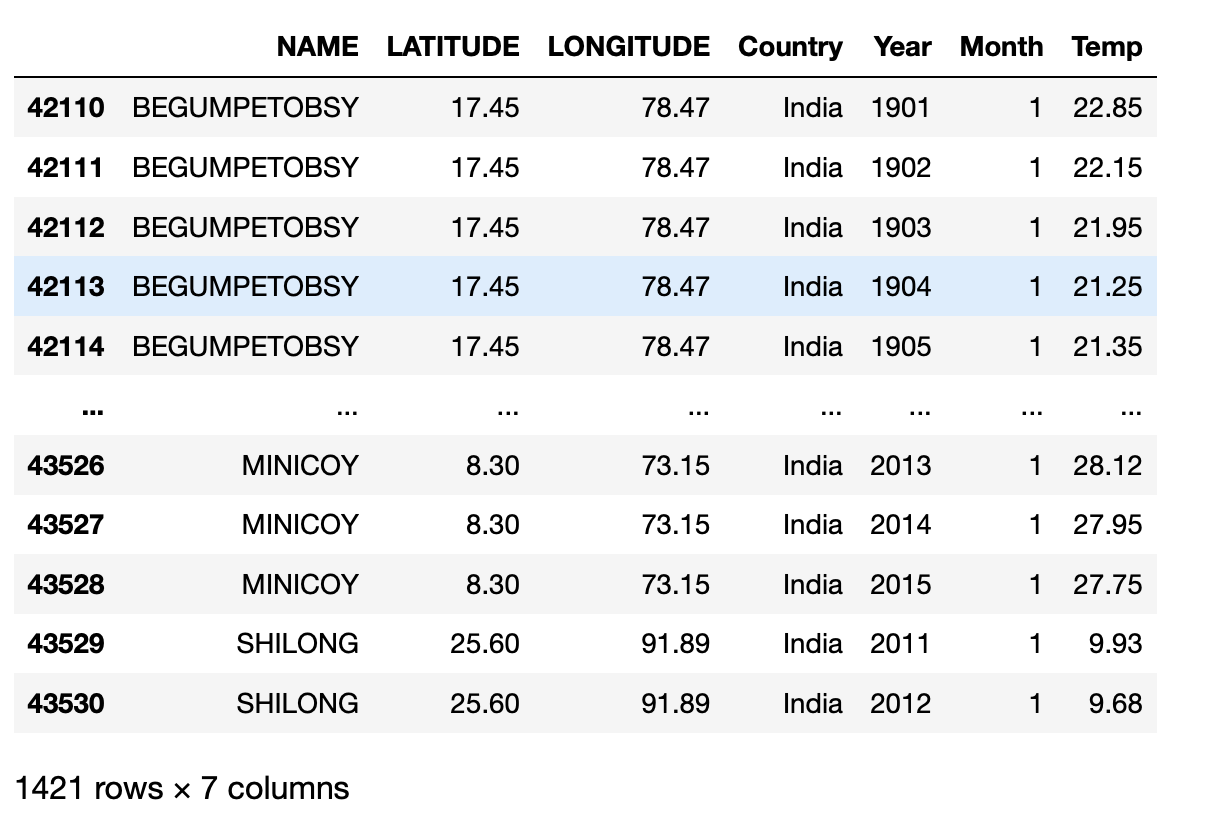

In [5]:
# the passing dataframe 'df' below is the dataframe you create in part 2
query_climate(df = combinedtemp_df, country = "India", year_begin = 1901, year_end = 2020, month = 1)

#All of the visible outputs match up and are the exact same looking at the example. Only get 1318 x 7 and not 1421 x 7, so
#some issue must have occured during the dataframe creation from part 2. Part 3 function looks correct to me

,NAME,LATITUDE,LONGITUDE,Country,Year,Month,Temp
442659,BEGUMPETOBSY,17.45,78.47,India,1901,1,22.85
442671,BEGUMPETOBSY,17.45,78.47,India,1902,1,22.15
442683,BEGUMPETOBSY,17.45,78.47,India,1903,1,21.95
442695,BEGUMPETOBSY,17.45,78.47,India,1904,1,21.25
442707,BEGUMPETOBSY,17.45,78.47,India,1905,1,21.35
...,...,...,...,...,...,...,...
458426,MINICOY,8.30,73.15,India,2013,1,28.12
458438,MINICOY,8.30,73.15,India,2014,1,27.95
458450,MINICOY,8.30,73.15,India,2015,1,27.75
458454,SHILONG,25.60,91.89,India,2011,1,9.93


## Part 4: Global warming ( 10 pts )

In this part, the goal is to create a bar plot which is used to compare average temperatures of decadeds 1901-1910 and 2011-2020.

The bar plot looks like the following:

![eg1.jpg](attachment:eg1.jpg)

In above plot, I select three different countries and compute the average temperatures of year range 1901-1910 and 2011-2020 in January. Then, I use (two) barplot(s) to visualize the average temperature. 

**You should do more than my sample plot:**

Select 4 different countries and 6 different months, then compute two average temperatures for each country in each certain month. Then visualize 6 different plots (included in a single plot using `subplot` command). Please add necessary labels, titles, and legends to make your plot clear.

You should write a function or class to simplify your code if necessary.

What is your conclusion?

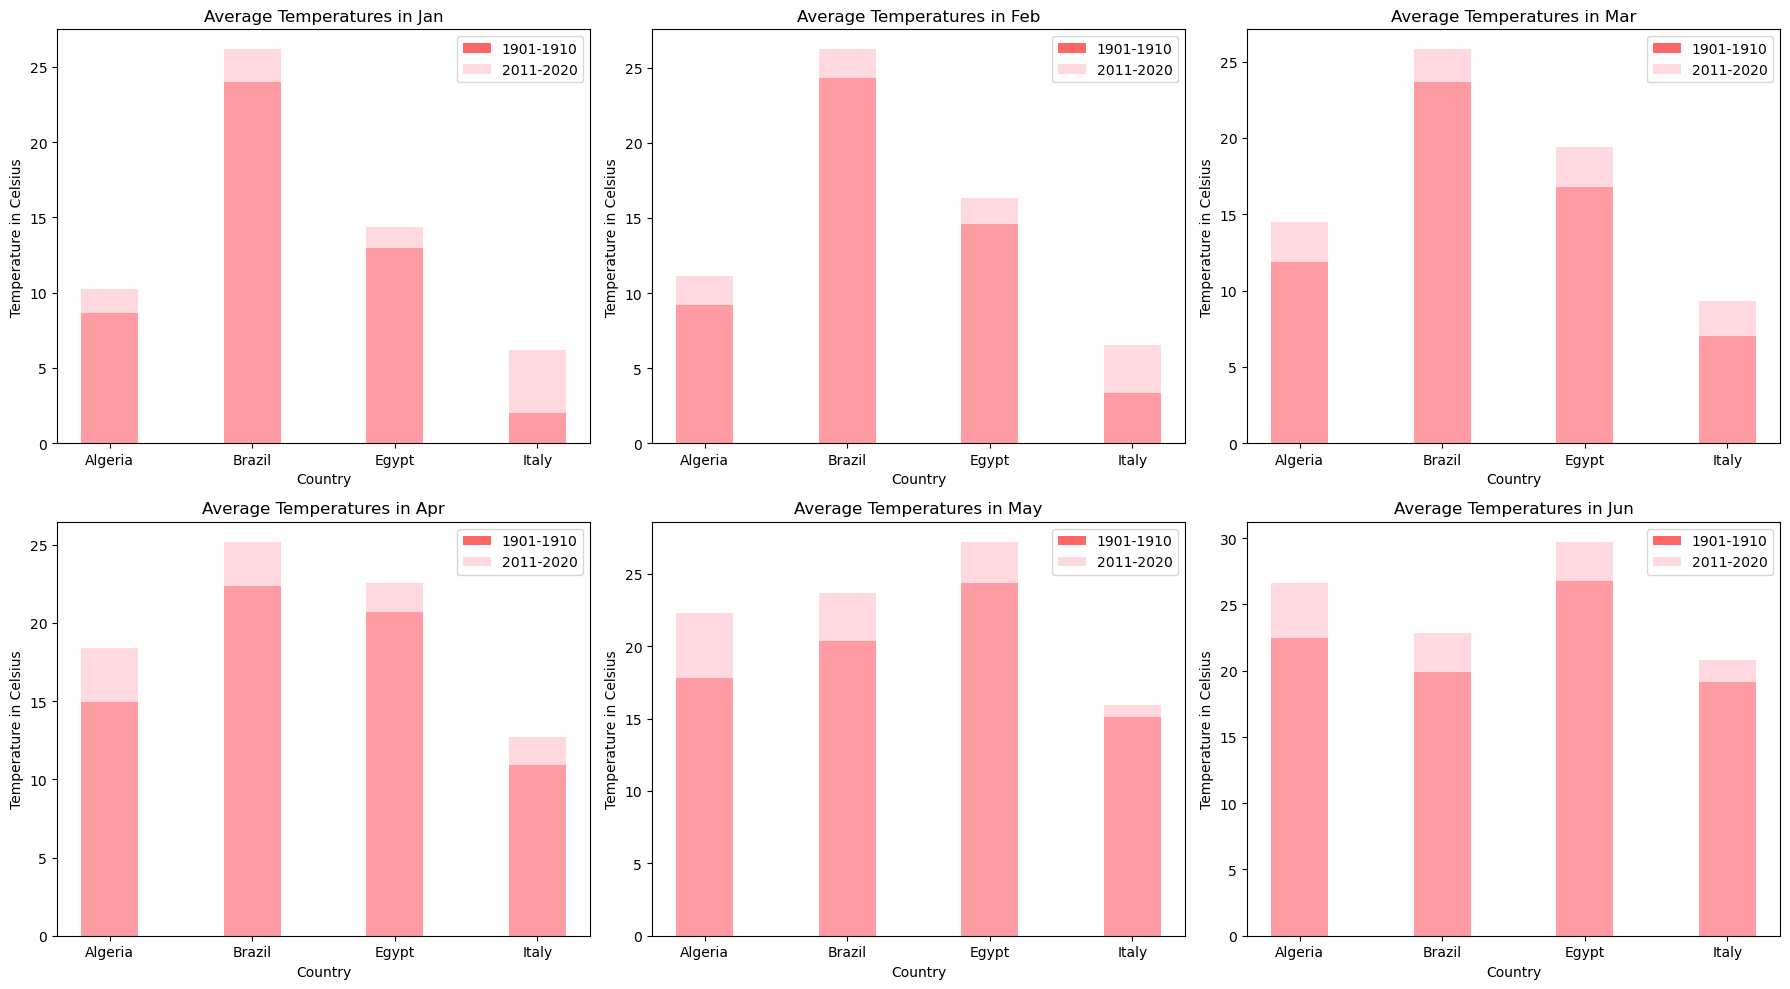

In [6]:
#What we want to do is pick 4 countries and 6 different months. Then we find the average temperature
#of each of these countries in each month for BOTH time frames. We graph all 6 of these plots via subplot.

#Pick Algeria, Brazil, Egypt, and Italy for countries. Just do first 6 months of calendar

#Used a few websites to try to help me figure this out. Mainly reading up on documentation and a little
#consulting stackoverflow. https://seaborn.pydata.org/generated/seaborn.barplot.html, 
#https://stackoverflow.com/questions/61888816/how-to-plot-a-bar-plot-of-2-categorical-columns-using-matplotlib-or-seaborn,
#https://stackoverflow.com/questions/24168065/stacking-3-bars-on-top-of-each-other-via-pythons-matplotlib


#What we can do is use our previous function to find the average temperatures for the year ranges for a month
def average_temperature(df, country, year_begin, year_end, month):
    #Call query_climate with arguments we just passed. Will get us the data we want with specified country, month and time frame
    #Then take mean of that to get the average temperature for that month in that country for specified year time frame
    average = query_climate(df,country, year_begin, year_end, month)

    average = average[["Temp"]].mean()

    return average

#Let's collect all the data first using our function we created. Bunch of grunt work as smarter way not coming to me
Algeria_1900_Jan = average_temperature(combinedtemp_df, "Algeria", 1901, 1910, 1)
Algeria_2000_Jan = average_temperature(combinedtemp_df, "Algeria", 2011, 2020, 1)

Brazil_1900_Jan = average_temperature(combinedtemp_df, "Brazil", 1901, 1910, 1)
Brazil_2000_Jan = average_temperature(combinedtemp_df, "Brazil", 2011, 2020, 1)

Egypt_1900_Jan = average_temperature(combinedtemp_df, "Egypt", 1901, 1910, 1)
Egypt_2000_Jan = average_temperature(combinedtemp_df, "Egypt", 2011, 2020, 1)

Italy_1900_Jan = average_temperature(combinedtemp_df, "Italy", 1901, 1910, 1)
Italy_2000_Jan = average_temperature(combinedtemp_df, "Italy", 2011, 2020, 1)

Algeria_1900_Feb = average_temperature(combinedtemp_df, "Algeria", 1901, 1910, 2)
Algeria_2000_Feb = average_temperature(combinedtemp_df, "Algeria", 2011, 2020, 2)

Brazil_1900_Feb = average_temperature(combinedtemp_df, "Brazil", 1901, 1910, 2)
Brazil_2000_Feb = average_temperature(combinedtemp_df, "Brazil", 2011, 2020, 2)

Egypt_1900_Feb = average_temperature(combinedtemp_df, "Egypt", 1901, 1910, 2)
Egypt_2000_Feb = average_temperature(combinedtemp_df, "Egypt", 2011, 2020, 2)

Italy_1900_Feb = average_temperature(combinedtemp_df, "Italy", 1901, 1910, 2)
Italy_2000_Feb = average_temperature(combinedtemp_df, "Italy", 2011, 2020, 2)

Algeria_1900_Mar = average_temperature(combinedtemp_df, "Algeria", 1901, 1910, 3)
Algeria_2000_Mar = average_temperature(combinedtemp_df, "Algeria", 2011, 2020, 3)

Brazil_1900_Mar = average_temperature(combinedtemp_df, "Brazil", 1901, 1910, 3)
Brazil_2000_Mar = average_temperature(combinedtemp_df, "Brazil", 2011, 2020, 3)

Egypt_1900_Mar = average_temperature(combinedtemp_df, "Egypt", 1901, 1910, 3)
Egypt_2000_Mar = average_temperature(combinedtemp_df, "Egypt", 2011, 2020, 3)

Italy_1900_Mar = average_temperature(combinedtemp_df, "Italy", 1901, 1910, 3)
Italy_2000_Mar = average_temperature(combinedtemp_df, "Italy", 2011, 2020, 3)

Algeria_1900_Apr = average_temperature(combinedtemp_df, "Algeria", 1901, 1910, 4)
Algeria_2000_Apr = average_temperature(combinedtemp_df, "Algeria", 2011, 2020, 4)

Brazil_1900_Apr = average_temperature(combinedtemp_df, "Brazil", 1901, 1910, 4)
Brazil_2000_Apr = average_temperature(combinedtemp_df, "Brazil", 2011, 2020, 4)

Egypt_1900_Apr = average_temperature(combinedtemp_df, "Egypt", 1901, 1910, 4)
Egypt_2000_Apr = average_temperature(combinedtemp_df, "Egypt", 2011, 2020, 4)

Italy_1900_Apr = average_temperature(combinedtemp_df, "Italy", 1901, 1910, 4)
Italy_2000_Apr = average_temperature(combinedtemp_df, "Italy", 2011, 2020, 4)

Algeria_1900_May = average_temperature(combinedtemp_df, "Algeria", 1901, 1910, 5)
Algeria_2000_May = average_temperature(combinedtemp_df, "Algeria", 2011, 2020, 5)

Brazil_1900_May = average_temperature(combinedtemp_df, "Brazil", 1901, 1910, 5)
Brazil_2000_May = average_temperature(combinedtemp_df, "Brazil", 2011, 2020, 5)

Egypt_1900_May = average_temperature(combinedtemp_df, "Egypt", 1901, 1910, 5)
Egypt_2000_May = average_temperature(combinedtemp_df, "Egypt", 2011, 2020, 5)

Italy_1900_May = average_temperature(combinedtemp_df, "Italy", 1901, 1910, 5)
Italy_2000_May = average_temperature(combinedtemp_df, "Italy", 2011, 2020, 5)

Algeria_1900_Jun = average_temperature(combinedtemp_df, "Algeria", 1901, 1910, 6)
Algeria_2000_Jun = average_temperature(combinedtemp_df, "Algeria", 2011, 2020, 6)

Brazil_1900_Jun = average_temperature(combinedtemp_df, "Brazil", 1901, 1910, 6)
Brazil_2000_Jun = average_temperature(combinedtemp_df, "Brazil", 2011, 2020, 6)

Egypt_1900_Jun = average_temperature(combinedtemp_df, "Egypt", 1901, 1910, 6)
Egypt_2000_Jun = average_temperature(combinedtemp_df, "Egypt", 2011, 2020, 6)

Italy_1900_Jun = average_temperature(combinedtemp_df, "Italy", 1901, 1910, 6)
Italy_2000_Jun = average_temperature(combinedtemp_df, "Italy", 2011, 2020, 6)


#Our mega dataset using all the data we collected. There's probably a smarter way to do this, but I don't know how.
#We need to do ["Temp"] for each data point as our function returns it with a datatype. We just want the raw value
temperature_data = {
    'Country': ['Algeria', 'Brazil', 'Egypt', 'Italy'],
    'Jan_1901_1910': [Algeria_1900_Jan["Temp"], Brazil_1900_Jan["Temp"], Egypt_1900_Jan["Temp"], Italy_1900_Jan["Temp"]],
    'Jan_2011_2020': [Algeria_2000_Jan["Temp"], Brazil_2000_Jan["Temp"], Egypt_2000_Jan["Temp"], Italy_2000_Jan["Temp"]],
    'Feb_1901_1910': [Algeria_1900_Feb["Temp"], Brazil_1900_Feb["Temp"], Egypt_1900_Feb["Temp"], Italy_1900_Feb["Temp"]],
    'Feb_2011_2020': [Algeria_2000_Feb["Temp"], Brazil_2000_Feb["Temp"], Egypt_2000_Feb["Temp"], Italy_2000_Feb["Temp"]],
    'Mar_1901_1910': [Algeria_1900_Mar["Temp"], Brazil_1900_Mar["Temp"], Egypt_1900_Mar["Temp"], Italy_1900_Mar["Temp"]],
    'Mar_2011_2020': [Algeria_2000_Mar["Temp"], Brazil_2000_Mar["Temp"], Egypt_2000_Mar["Temp"], Italy_2000_Mar["Temp"]],
    'Apr_1901_1910': [Algeria_1900_Apr["Temp"], Brazil_1900_Apr["Temp"], Egypt_1900_Apr["Temp"], Italy_1900_Apr["Temp"]],
    'Apr_2011_2020': [Algeria_2000_Apr["Temp"], Brazil_2000_Apr["Temp"], Egypt_2000_Apr["Temp"], Italy_2000_Apr["Temp"]],
    'May_1901_1910': [Algeria_1900_May["Temp"], Brazil_1900_May["Temp"], Egypt_1900_May["Temp"], Italy_1900_May["Temp"]],
    'May_2011_2020': [Algeria_2000_May["Temp"], Brazil_2000_May["Temp"], Egypt_2000_May["Temp"], Italy_2000_May["Temp"]],
    'Jun_1901_1910': [Algeria_1900_Jun["Temp"], Brazil_1900_Jun["Temp"], Egypt_1900_Jun["Temp"], Italy_1900_Jun["Temp"]],
    'Jun_2011_2020': [Algeria_2000_Jun["Temp"], Brazil_2000_Jun["Temp"], Egypt_2000_Jun["Temp"], Italy_2000_Jun["Temp"]]
}


#Months to plot (need index to iterate over)
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']

# Create subplot. We need this to be 2 by 3 to fit 6 plots. 2 rows and 3 columns
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

#Plot for each month using for loop. Goes through each month as an iterator
for i, month in enumerate(months):
    #Defines what subplot it'll be. Ensures that each subplot is separate when graphed. rows have to be 1st or 2nd, so
    #floor division ensures it's in 1 of 2 categories. Need 3 columns so modulate
    row = i // 3
    col = i % 3 
    
    #Makes sure we pick the correct month for each column. Hence, why we made sure our months array had it's values
    #named appropiately, so matches up from our average temperature data. That way able to easily go get it
    col_1901_1910 = f'{month}_1901_1910'
    col_2011_2020 = f'{month}_2011_2020'
    
    #Set positions for bars (just space them out)
    bar_positions = np.arange(len(temperature_data['Country']))
    
    #Plot for the first decade (1901-1910). Make sure in right subplot and label
    axes[row, col].bar(bar_positions, temperature_data[col_1901_1910], width=0.4, color='red', alpha=0.6, label='1901-1910')
    
    # Plot for the second decade (2011-2020) on top of the first one
    axes[row, col].bar(bar_positions, temperature_data[col_2011_2020], width=0.4, color='pink', alpha=0.6, label='2011-2020')
    
    # Set title and labels. Gets us overall title, x-axis, y-axis, legend, and country under each plot
    axes[row, col].set_title(f'Average Temperatures in {month}')
    axes[row, col].set_xticks(bar_positions)
    axes[row, col].set_xticklabels(temperature_data['Country'])
    axes[row, col].set_xlabel('Country')
    axes[row, col].set_ylabel('Temperature in Celsius')
    axes[row, col].legend()

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

Based on the data, I can conclude that for Algeria, Brazil, Egypt, and Italy the average temperatures in each of the six months have increased from 1901-1910 to 2011-2020. That suggests that the average temperature increases as more years pass by. Additionally, for both 1901-1990 and 2011-2020 the average temperature increased from January to June for each country overall. This makes sense as these are Western countries and the seasons are shifting from late Winter to early Summer. 

## Part 5: Plots (15 pts)

In this part, please create at least **three** complex and interesting interactive data visualizations using the dataframe created above. These plots must be of different types (e.g. scatter plot, line plot, histogram, bar plot, and etc) and are different from what you have created in Part 4. You are also welcome to create any plots which are not discussed in the lectures.

Alongside the plots, you should clearly describe (use markdown) what you do for each plot and state your conclusions.

Requirement: You should use seaborn.

**Grading is based on the plots and your description. Your explanation should match your plot.**

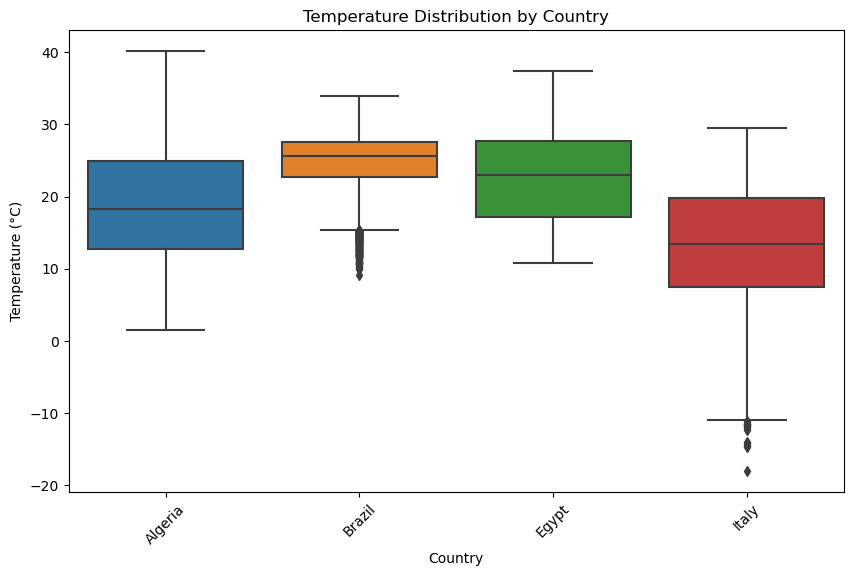

In [7]:
#Create the df just using the 4 countries from part 4. If use the dataframe from part 2, legend too big because of countries
countries = ['Egypt', 'Brazil', 'Algeria', 'Italy']
df = combinedtemp_df[combinedtemp_df['Country'].isin(countries)]

#Create a box plot of temperature distribution by the country
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Country', y='Temp')
plt.title('Temperature Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.show()

The box plot shown here visualizes the temperature distribution across the countries: Algeria, Brazi, Egypt, and Italy. It does this by factoring in the temperatures of each month from 1901 to 1910 and 2011 to 2020. The boxplots allow us to see how variable the temperature is for each country over the time periods of 1901-1910 and 2011-2020. Brazil has the least variation in its temperature and tends to be the hottest country comparatively to the other three. Italy has a large amount of variation, but tends to be the coldest country comparatively to the other three. Italy also has a lot of outliers indicating that Italy could have had some phenomena occuring that made it colder much colder than it normally is. Egypt and Algeria are about moderately variated with Egypt having less variation. Overall, it seems that the hottest to coldest countries in order are: Brazi, Egypt, Algeria, and Italy on average. 

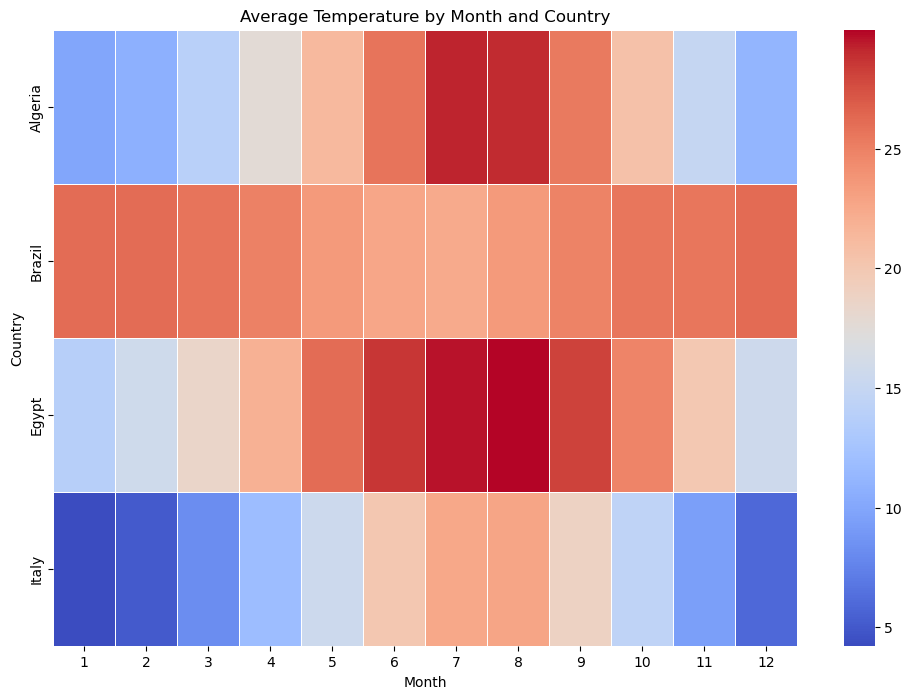

In [8]:
#Create a pivot table to be stored as a dataframe. Want to do Country vs Columns. Checking average
pivot_df = df.pivot_table(index='Country', columns='Month', values='Temp', aggfunc='mean')

#Create a heatmap of average temperature by month and country
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df, cmap='coolwarm', linewidths=.5)
plt.title('Average Temperature by Month and Country')
plt.xlabel('Month')
plt.ylabel('Country')
plt.show()

Here we have created a heatmap to visualize the average temperature by month and country. We first created this by making a pivot table with the Country as the index and the Month as the columns. We then took the average of the temperatures for each month in each country. We then plotted it as a heatmap specifying it to have line widths of 0.5 along with the coolwarm map style. This makes it so that the the warmer colors are higher temperatures and the colder colors are lower temperatures. A dark warmer color is a higher temperature than a light warm color. A dark colder color is a lower temperature than a light colder color. From this, we can see that Italy tends to be quite cold on average comparatively to all the other countries and that Brazil is the hottest. However, Algeria and Egypt have the hottest months on average around July and August. 

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

<Figure size 1000x800 with 0 Axes>

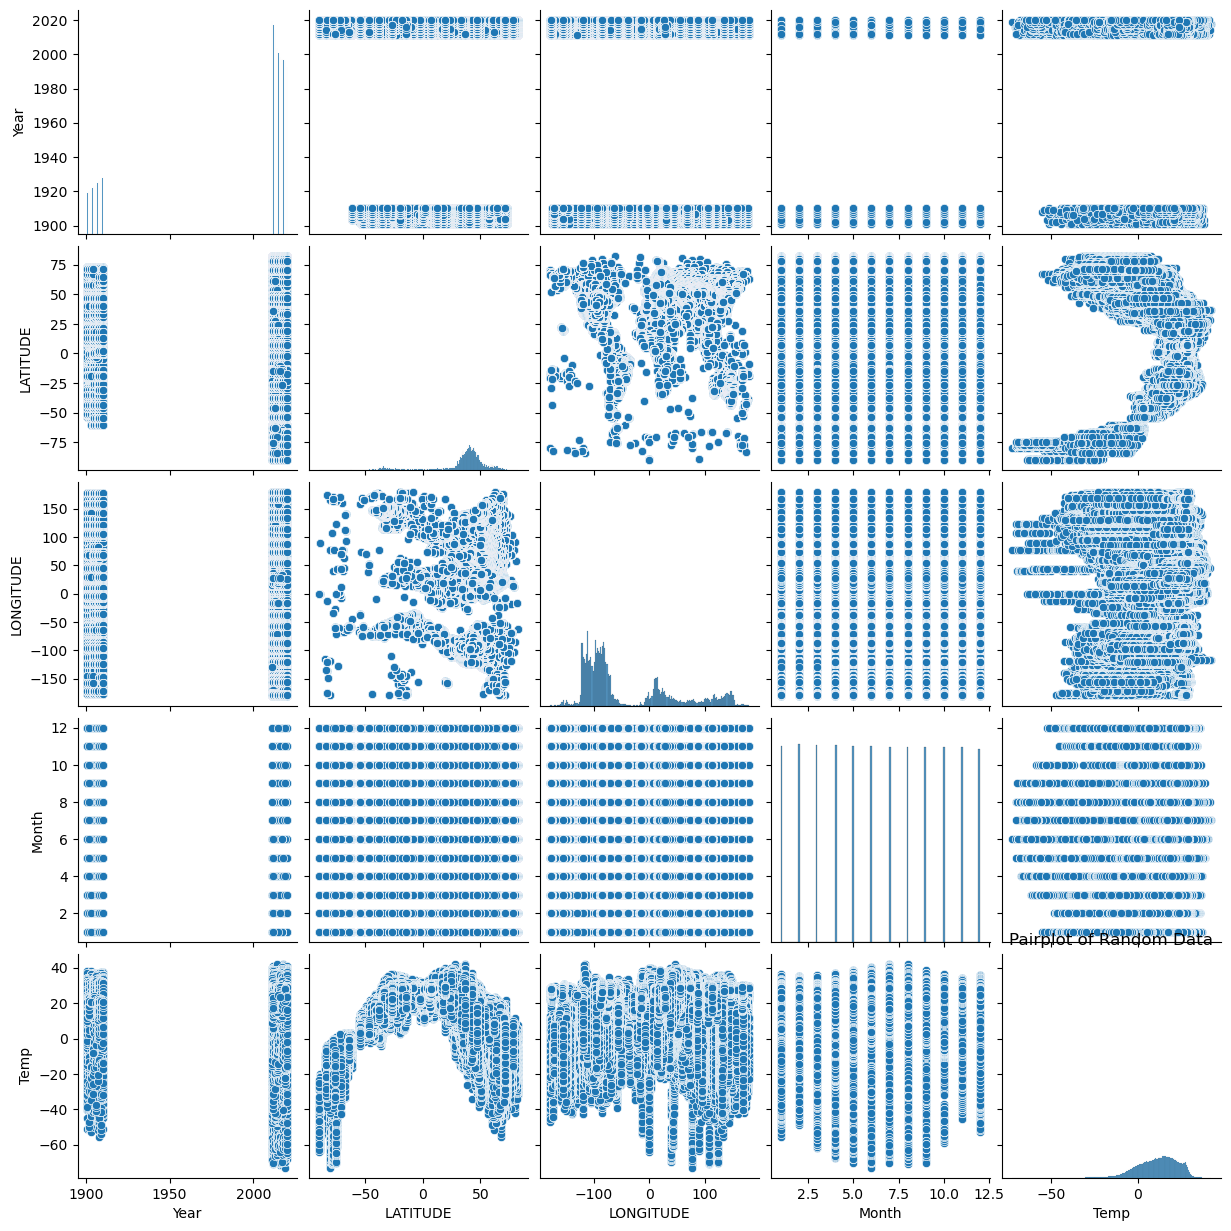

In [9]:
#Create a pairplot for the combinedtemp_df
plt.figure(figsize=(10, 8))
sns.pairplot(combinedtemp_df)
plt.title('Pairplot of Random Data')
plt.show()

The pairplot is done on the original combinedtemp_df to see how each variable relates to one another. Pairwise plots are done to check the relationship between two variables to see if there's any sort of distribution trend or correlation between variables. Looking at our pairplot, most of our pairplots are completely divided into two extremes or equally spaced out because of variables like Year mass dividing the data and Month equally spacing out data. However, the temperature pairplots do give out some information in relation to latitude and longtitude. It seems that there is an extremely loose correltation that closer to 0 for latitude a country is, the higher the temperature it has on average. There are fall offs in temperature for both directions going away from 0 for latitude. Longtitude there is less of a correlation, but it seems to indicate that a longtitude near 0 or increasing has its temperature decrease as the data slightly trends down from 0 to the right.

## Publish (5 pts)

Publish your work on github: Create a repository called HW in your github account, then upload your jupyter notebook. You should create a readme.md file to describe this repository. Please include the link in this cell

https://github.com/FoxDavenport/PIC16BHomework